In [1]:
import os

os.chdir('E:\Restart\Francis\YDG\Hackathons\Loan Prediction')

In [2]:
#importing required librarries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the data set
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Exploring Train Data

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.shape

(614, 13)

In [6]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

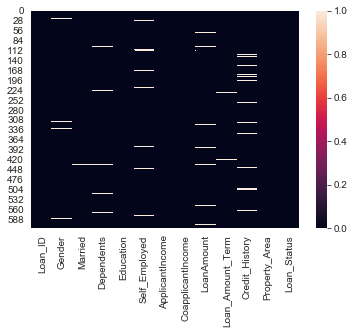

In [10]:
sns.heatmap(train_data.isnull())

In [11]:
#Handling missing data in train dataset
train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mean())

In [12]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
#Drop Customer Id column for train data
train_data.drop(['Loan_ID'], axis=1, inplace=True)

In [14]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Exploring Test Data

In [15]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
test_data.shape

(367, 12)

In [17]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [18]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [20]:
#Checking missing data
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

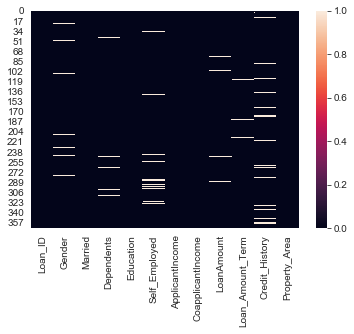

In [21]:
sns.heatmap(test_data.isnull())

In [22]:
#handling missing data in test dataset
test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mean())

In [23]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [24]:
#Drop Customer Id column for test data
test_data.drop(['Loan_ID'], axis=1, inplace=True)

In [25]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Training the Model

In [26]:
#Concatenating the two data sets (train data and test data)
final_df = pd.concat([train_data,test_data], axis=0)

In [27]:
final_df.shape

(981, 12)

In [28]:
#Creating dummies for categorical variables(columns)
final_df = pd.get_dummies(final_df, columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [29]:
final_df.shape

(981, 21)

In [30]:
#Removing duplicate columns in df
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [31]:
final_df.shape

(981, 21)

In [32]:
final_df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,1.0,146.412162,360.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,1.0,128.000000,360.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,1.0,66.000000,360.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,1.0,120.000000,360.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,1.0,141.000000,360.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [33]:
#Splitiing train data and test data from final_df
train = final_df.iloc[:614,:]
test = final_df.iloc[614:,:]

In [34]:
X_train = train.drop(['Loan_Status'], axis=1)
y_train = train['Loan_Status']

In [35]:
test.drop(['Loan_Status'], axis=1, inplace=True)

# Creating the Model

In [36]:
#Creating parameters
params = {
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7] 
}

In [37]:
def timer (start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('\n Time Taken: %i hours %i minutes and %s seconds.' %(thour, tmin, round(tsec,2)))

In [38]:
#Building model using XGBoost
import xgboost
classifier = xgboost.XGBClassifier() 

In [39]:
#Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(classifier, param_distributions=params, 
                                   n_iter = 5, scoring='roc_auc', n_jobs=-1, 
                                   cv=5, verbose=3)

In [40]:
from datetime import datetime

start_time=timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



 Time Taken: 0 hours 0 minutes and 3.38 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.2s finished


In [41]:
#Finding the best estimator
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [42]:
#Finding the best parameters for the classification
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [43]:
#Creating an instance for the classifier using the best parameters
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
       learning_rate=0.3, max_delta_step=0, max_depth=15,
       min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [44]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
       learning_rate=0.3, max_delta_step=0, max_depth=15,
       min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [45]:
predictions = classifier.predict(test)

In [46]:
predictions

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [47]:
pred=pd.DataFrame(predictions)
sub_df=pd.read_csv('test_data_copy.csv')
datasets=pd.concat([sub_df['Loan_ID'],pred],axis=1)
datasets.columns=['Loan_ID','Loan_Status']
datasets.to_csv('submission.csv', index=False)